In [43]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import os
import torch


In [4]:
# create a data frame from the car data with the 
# following columns: image file, label

# get the list of files in the directory
files = os.listdir('car_data')
# create a data frame
df = pd.DataFrame(columns=['file', 'label'])

for file in files:
    result = file.split('_')
    df.loc[len(df)] = [file, result[0]]




In [62]:
df.head()

,file,label
0,Ford_Flex_2010_39_19_260_35_6_75_68_201_16_AWD...,Ford
1,Chevrolet_Suburban_2011_41_17_320_53_8_79_76_n...,Chevrolet
2,Nissan_Maxima_2011_31_18_290_35_6_73_57_190_19...,Nissan
3,Chevrolet_Silverado 1500_2014_45_20_350_53_8_8...,Chevrolet
5,Lexus_IS_2019_41_17_260_35_6_71_56_184_19_AWD_...,Lexus


In [18]:
# gets rids of the car brands that have less than 2000 images
value_counts = df['label'].value_counts()
values_to_drop = value_counts[value_counts < 2000].index

df = df[~df['label'].isin(values_to_drop)]
df['label'].value_counts()

label
Chevrolet        5079
Toyota           4598
Ford             4416
BMW              4121
Nissan           3881
Audi             3131
Mercedes-Benz    3097
Honda            2675
Kia              2160
Lexus            2125
Hyundai          2091
GMC              2067
Name: count, dtype: int64

In [27]:
df.head()

,file,label
0,Ford_Flex_2010_39_19_260_35_6_75_68_201_16_AWD...,Ford
1,Chevrolet_Suburban_2011_41_17_320_53_8_79_76_n...,Chevrolet
2,Nissan_Maxima_2011_31_18_290_35_6_73_57_190_19...,Nissan
3,Chevrolet_Silverado 1500_2014_45_20_350_53_8_8...,Chevrolet
5,Lexus_IS_2019_41_17_260_35_6_71_56_184_19_AWD_...,Lexus


In [ ]:
# 

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['file'], df['label'], test_size=0.2, random_state=42)


In [58]:
# X_train.head()
X_test.head()

15969    Lexus_IS_2019_41_17_260_35_6_71_56_184_19_AWD_...
58827    Chevrolet_Corvette_2012_59_18_430_62_8_75_48_1...
48623    BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_...
19396    Honda_Accord_2013_25_17_180_24_4_72_56_189_26_...
5856     Toyota_Prius_2013_30_17_980_18_4_68_58_176_51_...
Name: file, dtype: object

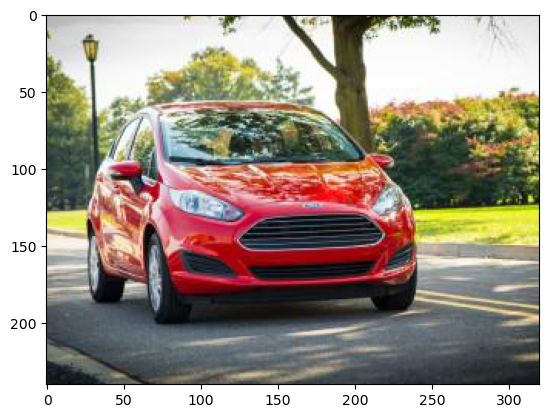

In [54]:
# show the first image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('car_data/' + X_train.iloc[0])
plt.imshow(img)

In [39]:
# convert the image into 255x255 tensor
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor()
])

img = transform(img)
img.shape

img



tensor([[[0.6902, 0.6902, 0.6980,  ..., 0.8588, 0.8314, 0.8078],
         [0.6902, 0.6941, 0.6980,  ..., 0.8745, 0.8588, 0.8510],
         [0.6980, 0.6980, 0.7020,  ..., 0.8863, 0.8824, 0.8784],
         ...,
         [0.0863, 0.0784, 0.0627,  ..., 0.0784, 0.0745, 0.0745],
         [0.0784, 0.0863, 0.0745,  ..., 0.0745, 0.0745, 0.0745],
         [0.0941, 0.1020, 0.0824,  ..., 0.0706, 0.0784, 0.0784]],

        [[0.7098, 0.7098, 0.7137,  ..., 0.8588, 0.8314, 0.8078],
         [0.7098, 0.7098, 0.7176,  ..., 0.8745, 0.8588, 0.8510],
         [0.7098, 0.7137, 0.7176,  ..., 0.8863, 0.8824, 0.8784],
         ...,
         [0.1137, 0.1059, 0.0941,  ..., 0.1137, 0.1098, 0.1098],
         [0.1098, 0.1176, 0.1059,  ..., 0.1098, 0.1098, 0.1098],
         [0.1255, 0.1333, 0.1137,  ..., 0.1059, 0.1137, 0.1137]],

        [[0.7216, 0.7137, 0.7020,  ..., 0.8588, 0.8314, 0.8078],
         [0.7216, 0.7216, 0.7098,  ..., 0.8745, 0.8588, 0.8510],
         [0.7294, 0.7216, 0.7137,  ..., 0.8863, 0.8824, 0.

In [40]:
y_train.head()

15969    Lexus_IS_2019_41_17_260_35_6_71_56_184_19_AWD_...
58827    Chevrolet_Corvette_2012_59_18_430_62_8_75_48_1...
48623    BMW_X5_2019_60_19_330_30_6_78_68_194_20_AWD_5_...
19396    Honda_Accord_2013_25_17_180_24_4_72_56_189_26_...
5856     Toyota_Prius_2013_30_17_980_18_4_68_58_176_51_...
Name: file, dtype: object

In [59]:
# transform all images to tensor
X_train_tensors = []
X_test_tensors = []

for i in range(len(X_train)):
    img = Image.open('car_data/' + X_train.iloc[i])
    X_train_tensors.append(transform(img))

for i in range(len(X_test)):
    img = Image.open('car_data/' + X_test.iloc[i])
    transformed_img = transform(img)
    y_train_tensors.append(transformed_img)




In [60]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(8 * 64 * 64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)
model.to(device='cpu')
print(model)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=32768, out_features=32, bias=True)
  (8): ReLU()
  (9): Linear(in_features=32, out_features=10, bias=True)
)


In [44]:
# hyper parameters

criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
epochs = 5
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [61]:
losses = []
for epoch in range(epochs):
    y_pred =  model(X_train_tensors)
    loss = criterion(y_pred, y_train_tensors)
    print(f'Epoch {epoch + 1}, loss = {loss.item()}')
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()


TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list of [Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor, Tensor,

In [ ]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [ ]:
# test on the test set
